In [ ]:
BRANCH = 'main'
!python -m pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH#egg=nemo_toolkit[all]

DEPRECATION: git+https://github.com/NVIDIA/NeMo.git@main#egg=nemo_toolkit[all] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Cloning https://github.com/NVIDIA/NeMo.git (to revision main) to /tmp/pip-install-ts0as0sy/nemo-toolkit_186e38e7478b4ffe92dd5fa2c34da8c0
  Running command git clone --filter=blob:none --quiet https://github.com/NVIDIA/NeMo.git /tmp/pip-install-ts0as0sy/nemo-toolkit_186e38e7478b4ffe92dd5fa2c34da8c0
  Resolved https://github.com/NVIDIA/NeMo.git to commit 2748c360169d1ffe35e18550e94405ac188f9227
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata 

In [ ]:
import nemo
import nemo.collections.asr as nemo_asr
import nemo.collections.nlp as nemo_nlp
import nemo.collections.tts as nemo_tts
import IPython

In [ ]:
Audio_Sample = '2086-149220-0033.wav'
!wget https://dldata-public.s3.us-east-2.amazonaws.com/2086-149220-0033.wav

--2025-05-14 06:07:13--  https://dldata-public.s3.us-east-2.amazonaws.com/2086-149220-0033.wav
Resolving dldata-public.s3.us-east-2.amazonaws.com (dldata-public.s3.us-east-2.amazonaws.com)... 3.5.133.208, 52.219.93.178, 3.5.130.161, ...
Connecting to dldata-public.s3.us-east-2.amazonaws.com (dldata-public.s3.us-east-2.amazonaws.com)|3.5.133.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237964 (232K) [audio/wav]
Saving to: ‘2086-149220-0033.wav.1’

2086-149220-0033.wa 100%[===================>] 232.39K  1.38MB/s    in 0.2s    

2025-05-14 06:07:13 (1.38 MB/s) - ‘2086-149220-0033.wav.1’ saved [237964/237964]



In [ ]:
IPython.display.Audio(Audio_Sample)

In [ ]:
import librosa
# Load audio file (returns: waveform, sample_rate)
A_S, sr = librosa.load('2086-149220-0033.wav', sr=None)

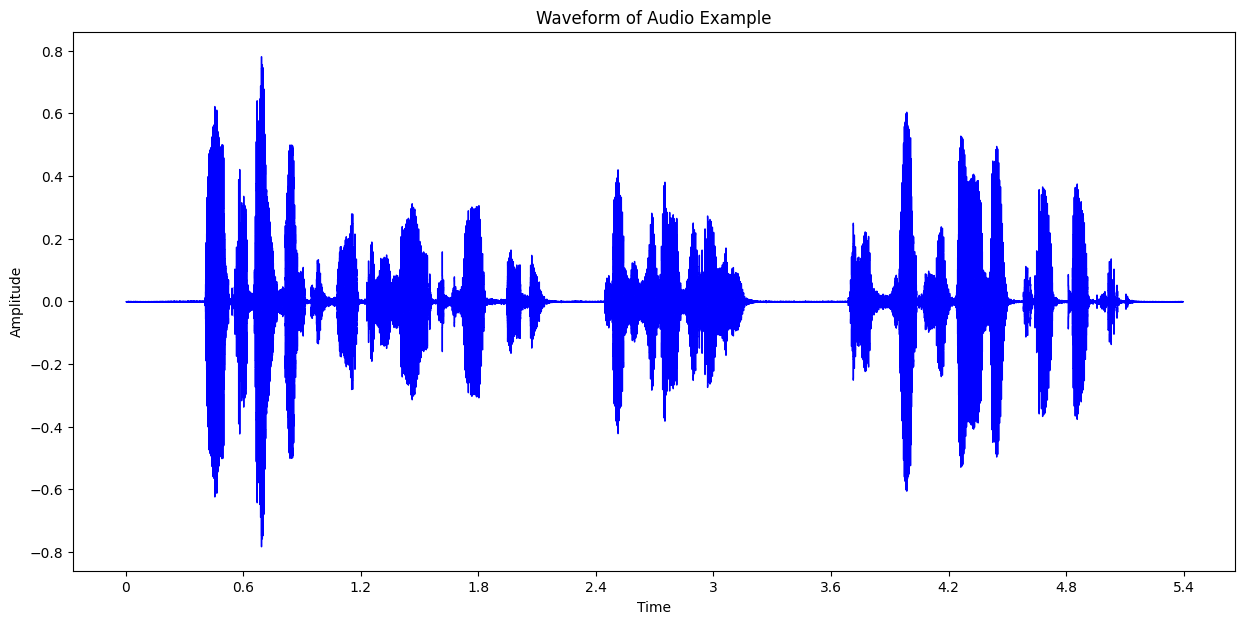

In [ ]:
%matplotlib inline
import librosa.display
import matplotlib.pyplot as plt

# Plot our example audio file's waveform
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Waveform of Audio Example')
plt.ylabel('Amplitude')

_ = librosa.display.waveshow(A_S, color='blue')

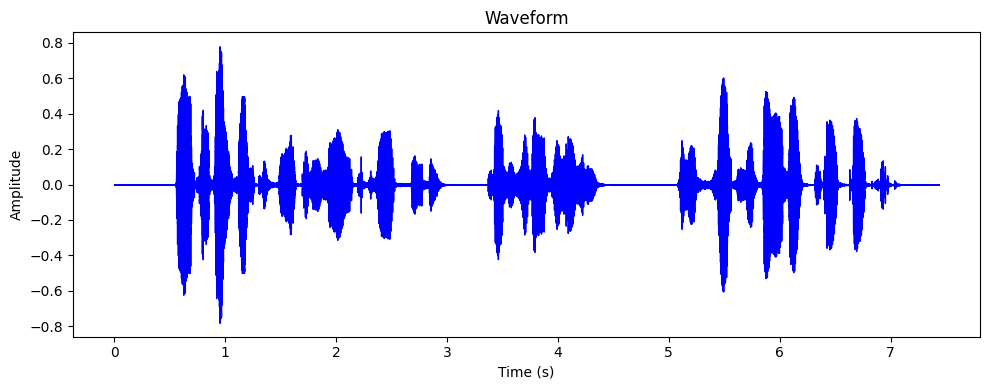

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(A_S, sr=sr, color='Blue')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


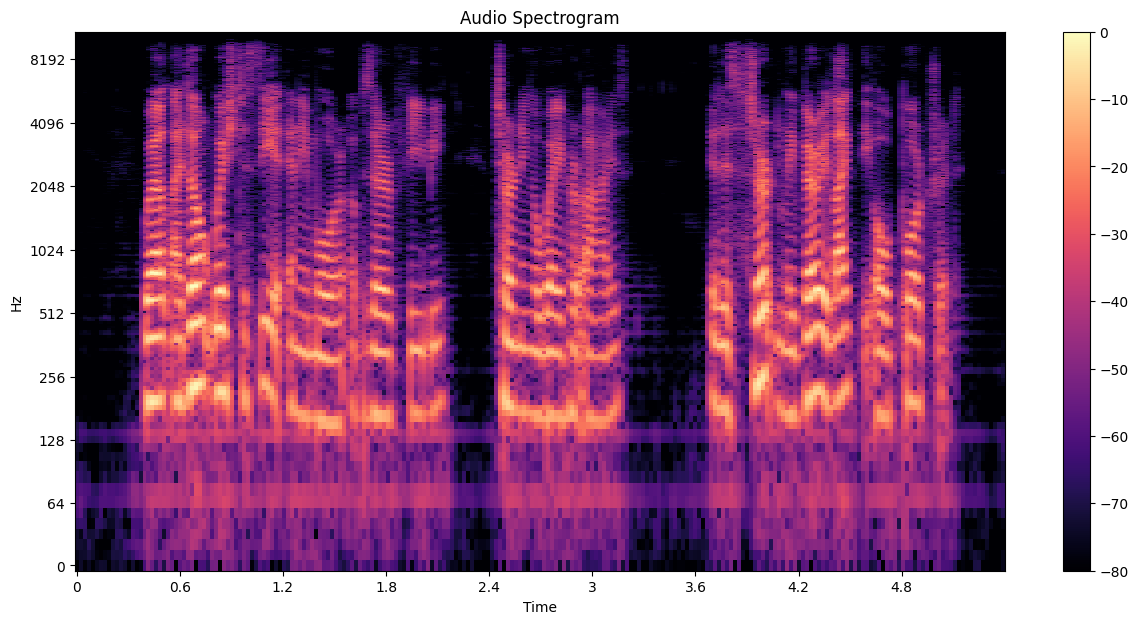

In [ ]:
import numpy as np

# Get spectrogram using Librosa's Short-Time Fourier Transform (stft)
spec = np.abs(librosa.stft(A_S))
spec_db = librosa.amplitude_to_db(spec, ref=np.max)  # Decibels

# Use log scale to view frequencies
librosa.display.specshow(spec_db, y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Audio Spectrogram');

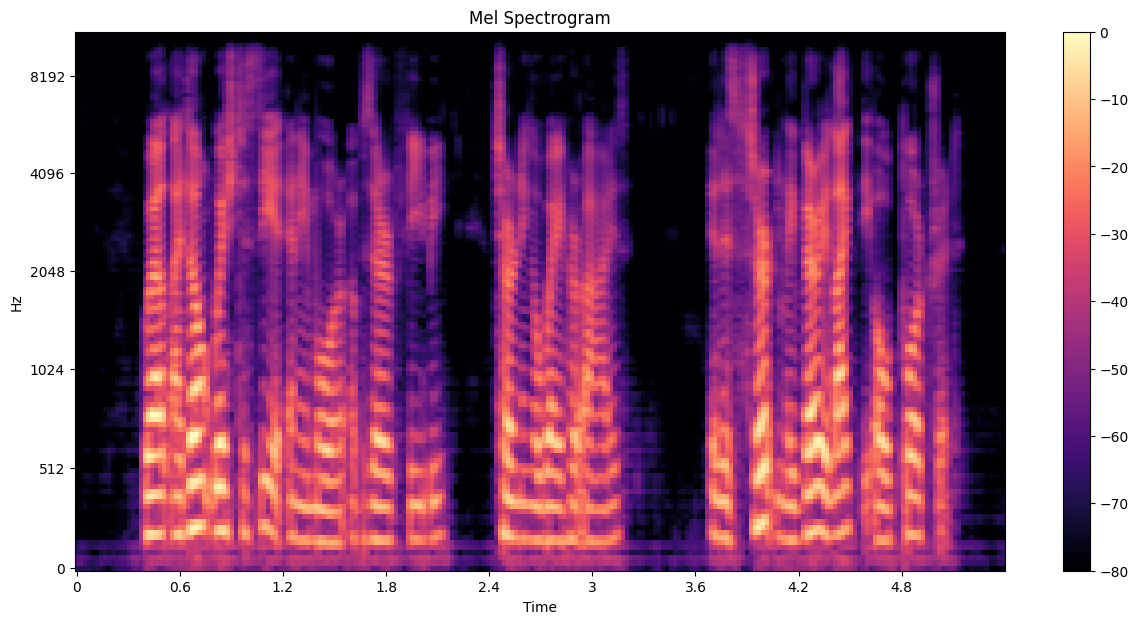

In [ ]:
# Plot the mel spectrogram of our sample
mel_spec = librosa.feature.melspectrogram(y=A_S)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

librosa.display.specshow(
    mel_spec_db, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title('Mel Spectrogram');

In [ ]:
# This line will download pre-trained QuartzNet15x5 model from NVIDIA's NGC cloud and instantiate it for you
#quartznet = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="QuartzNet15x5Base-En").cuda()
quartznet = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_en_quartznet15x5").cuda()

[NeMo I 2025-05-14 06:45:54 nemo_logging:393] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/stt_en_quartznet15x5/versions/1.0.0rc1/files/stt_en_quartznet15x5.nemo to /root/.cache/torch/NeMo/NeMo_2.4.0rc0/stt_en_quartznet15x5/16661021d16e679bdfd97a2a03944c49/stt_en_quartznet15x5.nemo
[NeMo I 2025-05-14 06:45:55 nemo_logging:393] Instantiating model from pre-trained checkpoint


[NeMo W 2025-05-14 06:45:57 nemo_logging:405] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /data2/voices/train_1k.json
    sample_rate: 16000
    labels:
    - ' '
    - a
    - b
    - c
    - d
    - e
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - m
    - 'n'
    - o
    - p
    - q
    - r
    - s
    - t
    - u
    - v
    - w
    - x
    - 'y'
    - z
    - ''''
    batch_size: 32
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: /asr_set_1.2/train/train_{0..1023}.tar
    num_workers: 20
    
[NeMo W 2025-05-14 06:45:57 nemo_logging:405] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loade

[NeMo I 2025-05-14 06:45:57 nemo_logging:393] PADDING: 16
[NeMo I 2025-05-14 06:45:58 nemo_logging:393] Model EncDecCTCModel was successfully restored from /root/.cache/torch/NeMo/NeMo_2.4.0rc0/stt_en_quartznet15x5/16661021d16e679bdfd97a2a03944c49/stt_en_quartznet15x5.nemo.


In [ ]:
spectrogram_generator = nemo_tts.models.FastPitchModel.from_pretrained(model_name = "tts_en_fastpitch").cuda()

[NeMo I 2025-05-14 06:49:55 nemo_logging:393] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_fastpitch/versions/1.8.1/files/tts_en_fastpitch_align.nemo to /root/.cache/torch/NeMo/NeMo_2.4.0rc0/tts_en_fastpitch_align/b7d086a07b5126c12d5077d9a641a38c/tts_en_fastpitch_align.nemo
[NeMo I 2025-05-14 06:49:57 nemo_logging:393] Instantiating model from pre-trained checkpoint


 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars.
INFO:NeMo-text-processing:Creating ClassifyFst grammars.
[NeMo W 2025-05-14 06:50:32 nemo_logging:405] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2025-05-14 06:50:32 nemo_logging:405] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /ws/LJSpeech/nvidia_ljspeech_train_clean_ngc.json
      sample_rate: 22050
      sup_data_path: /raid/LJSpeech/supplementary
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 10

[NeMo I 2025-05-14 06:50:32 nemo_logging:393] PADDING: 1
[NeMo I 2025-05-14 06:50:33 nemo_logging:393] Model FastPitchModel was successfully restored from /root/.cache/torch/NeMo/NeMo_2.4.0rc0/tts_en_fastpitch_align/b7d086a07b5126c12d5077d9a641a38c/tts_en_fastpitch_align.nemo.


In [ ]:
# List available HiFi-GAN pretrained models
nemo_tts.models.HifiGanModel.list_available_models()

[PretrainedModelInfo(
 	pretrained_model_name=tts_en_hifigan,
 	description=This model is trained on LJSpeech audio sampled at 22050Hz and mel spectrograms generated from Tacotron2, TalkNet, and FastPitch. This model has been tested on generating female English voices with an American accent.,
 	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_hifigan/versions/1.0.0rc1/files/tts_hifigan.nemo,
 	class_=<class 'nemo.collections.tts.models.hifigan.HifiGanModel'>
 ),
 PretrainedModelInfo(
 	pretrained_model_name=tts_en_lj_hifigan_ft_mixertts,
 	description=This model is trained on LJSpeech audio sampled at 22050Hz and mel spectrograms generated from Mixer-TTS. This model has been tested on generating female English voices with an American accent.,
 	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_lj_hifigan/versions/1.6.0/files/tts_en_lj_hifigan_ft_mixertts.nemo,
 	class_=<class 'nemo.collections.tts.models.hifigan.HifiGanModel'>
 ),
 PretrainedModelInfo(
 	pr

In [ ]:
vocoder = nemo_tts.models.HifiGanModel.from_pretrained(model_name="tts_hifigan_ft_fastpitch").cuda()

[NeMo I 2025-05-14 07:03:38 nemo_logging:393] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_multispeaker_fastpitchhifigan/versions/1.10.0/files/tts_en_hifitts_hifigan_ft_fastpitch.nemo to /root/.cache/torch/NeMo/NeMo_2.4.0rc0/tts_en_hifitts_hifigan_ft_fastpitch/dcbdefa79d5e3587c93636d4f53260b8/tts_en_hifitts_hifigan_ft_fastpitch.nemo
[NeMo I 2025-05-14 07:03:44 nemo_logging:393] Instantiating model from pre-trained checkpoint


[NeMo W 2025-05-14 07:03:45 nemo_logging:405] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.VocoderDataset
      manifest_filepath: /manifests/hifitts_fp_1000epoch_mels_train.json
      sample_rate: 44100
      n_segments: 16384
      max_duration: null
      min_duration: 0.75
      load_precomputed_mel: true
      hop_length: 512
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 100
      num_workers: 4
    
[NeMo W 2025-05-14 07:03:45 nemo_logging:405] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.Vocod

[NeMo I 2025-05-14 07:03:45 nemo_logging:393] PADDING: 0
[NeMo I 2025-05-14 07:03:45 nemo_logging:393] STFT using exact pad
[NeMo I 2025-05-14 07:03:45 nemo_logging:393] PADDING: 0
[NeMo I 2025-05-14 07:03:45 nemo_logging:393] STFT using exact pad
[NeMo I 2025-05-14 07:03:46 nemo_logging:393] Model HifiGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_2.4.0rc0/tts_en_hifitts_hifigan_ft_fastpitch/dcbdefa79d5e3587c93636d4f53260b8/tts_en_hifitts_hifigan_ft_fastpitch.nemo.
